# Actividad 2 Curso 4: Aplicaciones en Ciencias de Datos e Inteligencia Artificial
Autores: Moisés Marquina y Dora Novoa

### 2.1 Solución cerrada de regresión lineal
5 ptos Abrir entorno de programación, de preferencia utilizar Visual Studio Code, Google Colaba o Jupyter
Notebook. 

5 ptos Utilizando Numpy o Scipy genere 1,000 datos que distribuyan uniforme entre 0 y 3, U(0, 3). Este
arreglo representará su variable independiente, tambión denominado a lo largo de este curso como
feature, descriptor o input.

El método de np.random.uniform esta en la documentacio de [numpay.org](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.uniform.html)

5 ptos A través de la misma librería genere los 1,000 datos de la variable dependiente, también conocida
como target u output, de la siguiente forma y = 5 + 2x + U(2, 4)

5 ptos Por medio de matplotlib o seaborn genere un gráfico de dispersión (scatter plot) entre la variable
dependiente y la variable independiente. Ajuste título, nombre de ejes, tamaño de los valores en
los ejes, tamaño de la figura, colores de los y la transparencia de los puntos.

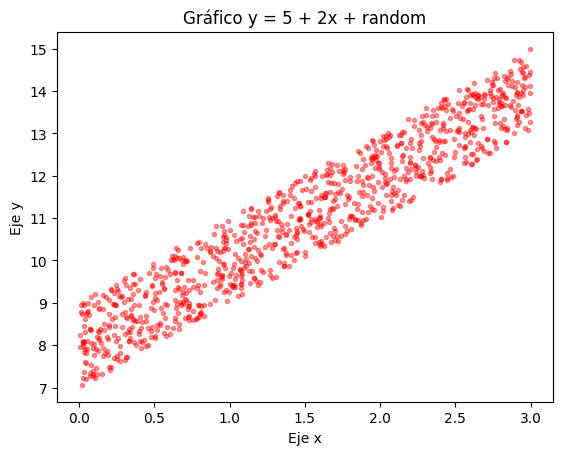

In [105]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.uniform(0,3, size=1000)
Y = 5 + 2*X + np.random.uniform(2,4,1000)

plt.plot(X, Y, '.', color='red', alpha=0.4)
plt.title("Gráfico y = 5 + 2x + random")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.show()
  



5 ptos Genere una función que permita visualizar los datos simulados. Esta función debe recibir como
argumentos la variable dependiente y, la variable independiente x y el número de datos a simular.
La función debe permitir visualizar o guardar la imagen.

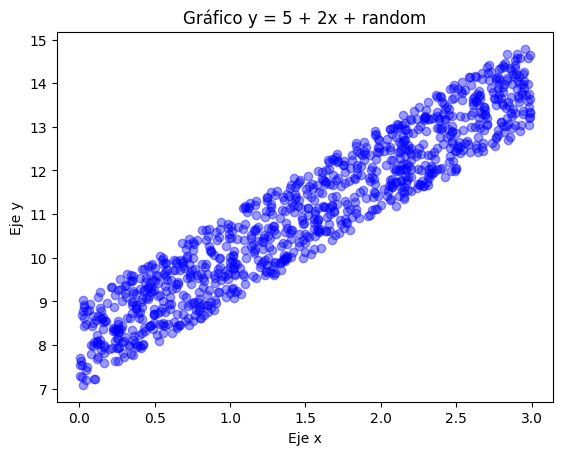

In [106]:
import numpy as np
import matplotlib.pyplot as plt
def visualizar_datos(x, y, num_datos=1000):
    x = np.random.uniform(0,3, size=num_datos)
    y = 5 + 2*x + np.random.uniform(2,4,num_datos)

    plt.scatter(x, y, color='blue', alpha=0.4)
    plt.title("Gráfico y = 5 + 2x + random")
    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    plt.show()
  
visualizar_datos(X, Y, 1000)

5 ptos Aplique las operaciones matriciales necesarias para ajustar una regresión lineal a través de su
solución cerrada (use numpy.linalg). Cree una función que reciba la variable dependiente y la
variable independiente, esta función debe retornar los parámetros optimizados.



In [107]:
import numpy as np
x = np.random.uniform(0,3, size=1000)
y = 5 + 2*X + np.random.uniform(2,4,1000)
X = x.reshape(-1, 1) # se cambia a matriz de una sola columna

def ajustar_regresion(X, y):
    X_arr = np.c_[np.ones(X.shape[0]), X] # agrega una columna de 1's a la matriz X se concatenea a la variable independiente
    # ajuste = (X^T * X)^-1 * X^T * y
    ajuste = np.linalg.inv(X_arr.T.dot(X_arr)).dot(X_arr.T).dot(y)
    return ajuste
ajuste = ajustar_regresion(X, y)
# el ajuste será los coeficientes de la ecuación de la recta  (intercepto y pendiente), así: y = ajuste[0] + ajuste[1]*x   
# print(ajuste)


5 ptos Utilizando Matplotlib o seaborn genere un gráfico que incluya la solución (recta óptima) y
los datos utilizados. Cree una función que reciba x, y y los parámetros óptimos y cree dicha
visualización.

Para la generación de la línea X usamos el np.linspace en la documentación [numpy.org ver aquí](https://numpy.org/doc/2.0/reference/generated/numpy.linspace.html#numpy-linspace)

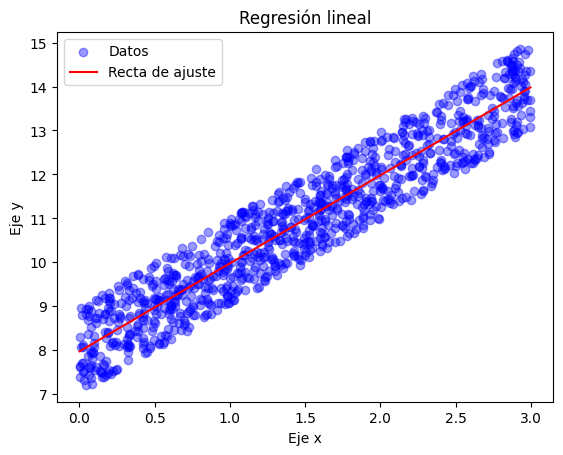

In [108]:
import numpy as np
import matplotlib.pyplot as plt

X = np.random.uniform(0,3, size=1000)
Y = 5 + 2*X + np.random.uniform(2,4,1000)

def ajustar_regresion(x, y):
    X = x.reshape(-1, 1) # se cambia a matriz de una sola columna
    X_arr = np.c_[np.ones(X.shape[0]), X] # agrega una columna de 1's a la matriz X se concatenea a la variable independiente
    # ajuste = (X^T * X)^-1 * X^T * y
    ajuste = np.linalg.inv(X_arr.T.dot(X_arr)).dot(X_arr.T).dot(y)
    return ajuste

# el ajuste será los coeficientes de la ecuación de la recta  (intercepto y pendiente), así: y = ajuste[0] + ajuste[1]*x   
ajuste = ajustar_regresion(X, Y)

def graficar_recta_ajuste(x, y, ajuste):
    # np.linspace(inicio, fin, num_puntos_generar)   genera un número entre un valor inicial y un valor final. Para esto toma el valor de el arreglo x mínimo y máximo para seguir con la recta
    x_lin = np.linspace(x.min(), x.max(), 100) # Crear valores de X para la recta de ajuste
    y_lin = ajuste[0] + ajuste[1] * x_lin  # Calcular los valores de Y para la recta de ajuste con y = mx + b
    
    plt.scatter(x, y, color='blue', alpha=0.4) # graficar los datos 
    plt.plot(x_lin, y_lin,color='red') # graficar la recta de ajuste
    
    plt.title("Regresión lineal")
    plt.xlabel("Eje x")
    plt.ylabel("Eje y")
    plt.legend(["Datos", "Recta de ajuste"])
    plt.show()

graficar_recta_ajuste(X, Y, ajuste)


5 ptos Cree una clase cuyo nombre sea regressionLineal que contenga los métodos antes generados. La
clase debe ser inicializada con los atributos: tipo de datos (simulado o real) y tamaño de la base
de datos.

Usamos el método:  np.linspace(inicio, fin, num_puntos_generar)   

genera un número especificado de valores espaciados uniformemente entre un valor inicial y un valor final. Para esto toma el valor de el arreglo x mínimo y máximo para seguir con la recta

In [109]:

class regressionLineal():
    def __init__(self, tipo_datos, cantidad, x=None, y=None):
        self.x = x
        self.y = y
        self.tipo_datos = tipo_datos
        self.cant = cantidad
    
    def generar_datos(self): # en el caso de que no se pasen los datos
        if self.tipo_datos == "simulado":
            self.x = np.random.uniform(0,3, size=self.cant)
            self.y = 5 + 2*self.x + np.random.uniform(2,4,self.cant)
        return self.x, self.y
    
    
    def visualizar_datos(self):
        plt.scatter(self.x, self.y, color='blue', alpha=0.4)
        plt.title("Gráfico regresión lineal")
        plt.xlabel("Eje x")
        plt.ylabel("Eje y")
        plt.show()
        
    def ajustar_regresion(self):
        X = self.x.reshape(-1, 1) # se cambia a matriz de una sola columna
        X_arr = np.c_[np.ones(X.shape[0]), X] # agrega una columna de 1's a la matriz X se concatenea a la variable independiente
        # ajuste = (X^T * X)^-1 * X^T * y
        ajuste = np.linalg.inv(X_arr.T.dot(X_arr)).dot(X_arr.T).dot(self.y)
        return ajuste
    
    def graficar_recta_ajuste(self):
        
        self.generar_datos()
        ajuste = self.ajustar_regresion()

        titulo =f" y = {ajuste[0].round(2)} + {ajuste[1].round(2)} * x"
        
        x_lin = np.linspace(self.x.min(), self.x.max(), 100) # Crear valores de X para la recta de ajuste
        y_lin = ajuste[0] + ajuste[1] * x_lin  # Calcular los valores de Y para la recta de ajuste con y = mx + b
        
        plt.plot(x_lin, y_lin,color='red') # graficar la recta de ajuste
        plt.scatter(self.x, self.y, color='blue', alpha=0.4) # graficar los datos 
        

        plt.title("Regresión lineal \n" + titulo)
        plt.xlabel("Eje x")
        plt.ylabel("Eje y")
        plt.show()


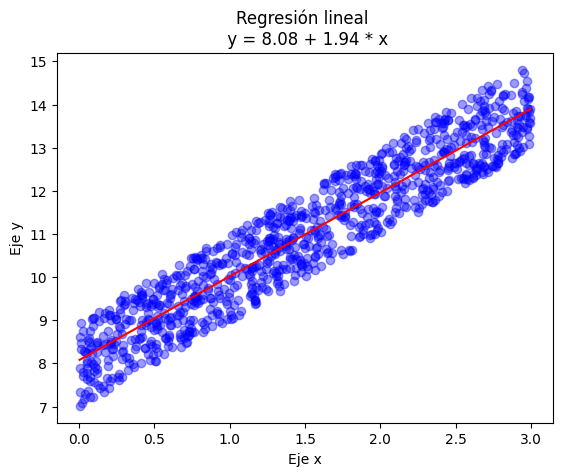

In [110]:
reglineal = regressionLineal("simulado", 1000)
reglineal.graficar_recta_ajuste()


### 2.2 Regresión Polinomial (25 puntos)

0 ptos Cargue la base de datos adjunta a la actividad (measurements.csv).

5 ptos Mediante Matplotlib o seaborn visualizar las variables contenidas en la base de datos con un
scatter plot.

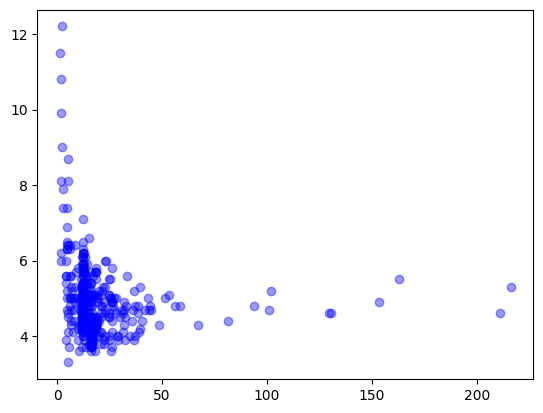

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values


plt.scatter(x, y, color='blue', alpha=0.4)
plt.show()


5 ptos Use la regresión lineal previamente implementada para predecir el consumo (consume) mediante la
distancia recorrida (distance). Se recomienda usar la clase previamente implementada regressionLineal,
sin embargo, también se permite usar funciones aisladas. El uso de métodos disponibles en sklearn
también está permitido pero se evaluará con la mitad del puntaje asignado a este item.


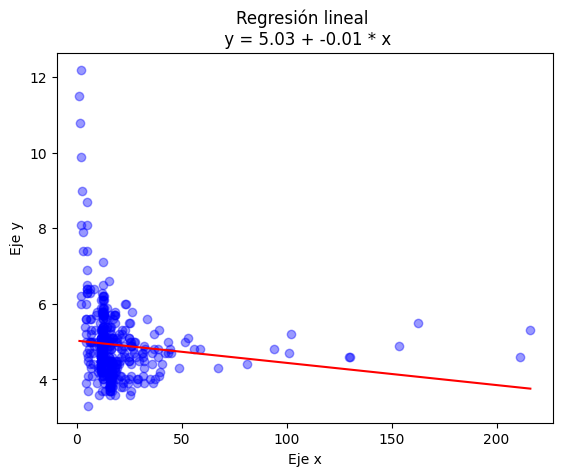

In [112]:
tamaño = df["distance"].shape[0]

reglineal = regressionLineal("real", tamaño, x, y)
reglineal.graficar_recta_ajuste()


5 ptos Genere una transformación polinomial de la variable independiente, para esta transformación se
recomienda utilizar el método disponible por sklearn preprocessing.PolynomialFeatures.

Para este resultado lo saque del video de [Polynomial Regression for Machine Learning](https://www.youtube.com/watch?v=Q8UfQ_aoCeQ&list=PLq6kDSGyUJS511jXM4M-BxVXx9bpsCIRi&index=82)  Ver min. 13:14

También ver la documentación de [scikit-learn.org Polymonial Features](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


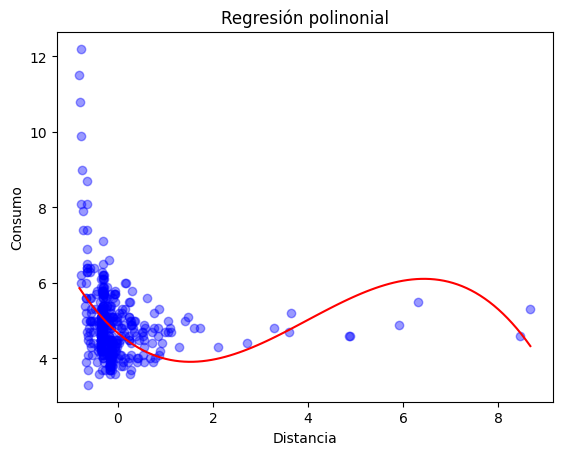

In [113]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values

X = x.reshape(-1, 1)  # se cambia a matriz de una sola columna sino sale error
X = StandardScaler().fit_transform(X) # normaliza los datos

poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X)

modelo = LinearRegression()
modelo.fit(X_poly, y)

# predice los valores según el modelo de regresión polinomial
x_linea = np.linspace(X.min(), X.max(), 100).reshape(-1, 1) # hago la linea con los valores min. y max. de X
y_linea = modelo.predict(poly.transform(x_linea))

plt.scatter(X, y, color='blue', alpha=0.4)
plt.plot(x_linea, y_linea, color='red')
plt.title("Regresión polinonial")
plt.xlabel("Distancia")
plt.ylabel("Consumo")
plt.show()

5 ptos Ajuste regresiones polinomiales de diferentes grados.

5 ptos Grafique los modelos resultantes, ¿Qué observa en el error cuadrático medio y en la forma de las
predicciones a medida que aumenta el grado del polinomio?

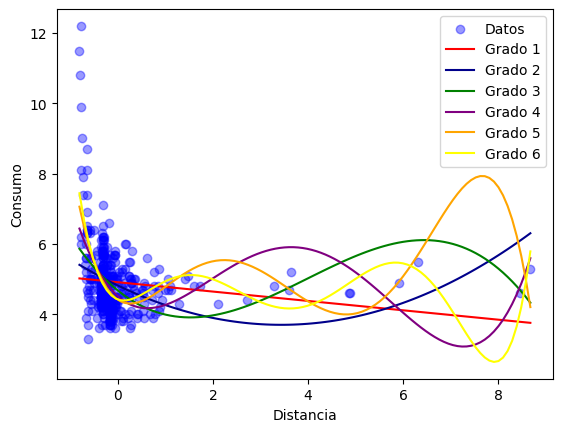

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values

X = x.reshape(-1, 1)  # se cambia a matriz de una sola columna 

# estandarizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)


def calcular_polinomial(grado, x, y):
    
    poly = PolynomialFeatures(grado)
    X_poly = poly.fit_transform(x)

    modelo = LinearRegression()
    modelo.fit(X_poly, y)

    # predice los valores según el modelo de regresión polinomial
    x_linea = np.linspace(x.min(), x.max(), 100).reshape(-1, 1) # hago la linea con los valores min. y max. de X
    y_linea = modelo.predict(poly.transform(x_linea))
    # print(modelo.intercept_, modelo.coef_) # intercepto y coeficientes para calcular la ecuación...
    return x_linea, y_linea

polinomio = {}
for i in range(1, 7):
    polinomio[i] = calcular_polinomial(i, X, y)
    
plt.scatter(X, y, color='blue', alpha=0.4)
colores = ['red', 'darkblue', 'green', 'purple', 'orange', 'yellow']

# colores = ['red', 'darkblue', 'green', 'purple', 'orange', 'yellow', 'black', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'olive']

for i in range(1, 7):
    plt.plot(polinomio[i][0], polinomio[i][1], color=colores[i-1])

plt.xlabel("Distancia")
plt.ylabel("Consumo")
plt.legend(["Datos", "Grado 1", "Grado 2", "Grado 3", "Grado 4","Grado 5", "Grado 6"])
# plt.legend(["Datos", "Grado 1", "Grado 2", "Grado 3", "Grado 4","Grado 5", "Grado 6",  "Grado 7", "Grado 8", "Grado 9", "Grado 10", "Grado 11", "Grado 12", "Grado 13"])
plt.show()


**Respuesta:** Observamos que a mayor grado la curva se asemeja a una onda, lo que fluctua entre altos y bajos. Creemos que es el grado 6 el que más se acomoda a la realidad de los datos sin tanto ruido (color amarillo). Pero probamos otros grados que se vió como Overfitting. 

El grado 1, es la misma línea de la regresión lineal como el ejemplo anterior con nuestra clase creada, seríaun Underfitting. 

En conclusión el Good fit = grado 6 dado que tiene menor distancia del dato a la linea, mínima de errores cuadráticos, sólo se vé por inspección gráfica. 

### 2.3 Regresión con Penalización (bonus 10 puntos)

2.5 ptos Separe la base de datos en una para ajustar el modelo y otra para testearlo (80%-20%).

Para esto usamos el módulo **from sklearn.model_selection import train_test_split** ver video en [aquí](https://www.youtube.com/watch?v=SjOfbbfI2qY) donde lo explica.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

usamos el random_state = 13 por poner un número que estemos de acuerdo en el grupo


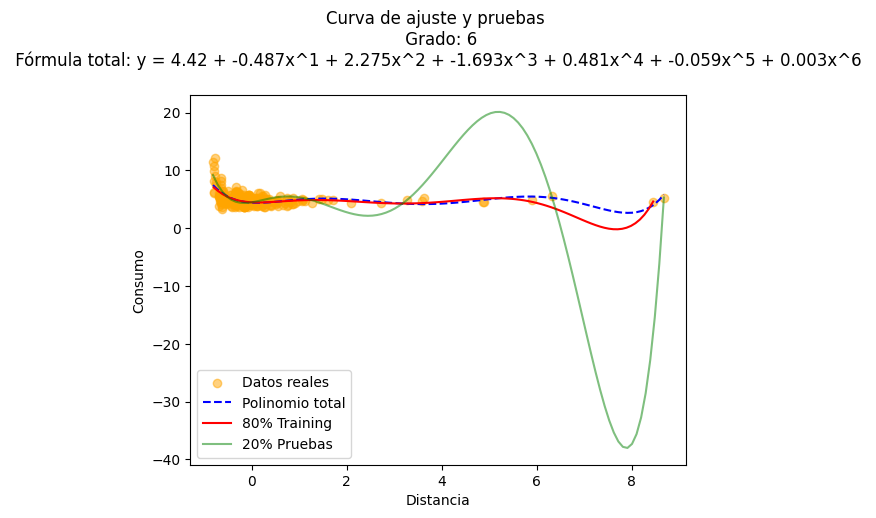

Curva de ajuste y pruebas 
 Grado: 6
 Fórmula total: y = 4.42 + -0.487x^1 + 2.275x^2 + -1.693x^3 + 0.481x^4 + -0.059x^5 + 0.003x^6 

Fórmula Trainig: y = 4.47 + -0.455x^1 + 1.926x^2 + -1.565x^3 + 0.491x^4 + -0.066x^5 + 0.003x^6 
Fórmula Test: y = 4.47 + 1.293x^1 + 2.877x^2 + -5.201x^3 + 2.244x^4 + -0.352x^5 + 0.018x^6 


In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values
X = x.reshape(-1, 1)  # x se cambia a matriz de una sola columna
# estandarizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# divide los datos 80%/20% de forma aleatoria donde el 20% será para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


def calcular_polinomial(grado, x, y):
    
    poly = PolynomialFeatures(grado)
    X_poly = poly.fit_transform(x)

    modelo = LinearRegression()
    modelo.fit(X_poly, y)

    # predice los valores según el modelo de regresión polinomial
    x_linea = np.linspace(x.min(), x.max(), 100).reshape(-1, 1) # hago la linea con los valores min. y max. de X
    y_linea = modelo.predict(poly.transform(x_linea))
    # Obtener los coeficientes (thetas) y el intercepto para visualizar al ecuación
    coefs = modelo.coef_
    intercepto = modelo.intercept_
    
    return x_linea, y_linea, intercepto, coefs

def imprimir_formula (intercepto, coefs):
    formula = f"y = {intercepto.round(2)} "
    # para cada uno de los coefs, es decir los thetas o x^n el coef[0] = 0.0
    for i in range(1, len(coefs)):
        formula += f"+ {coefs[i].round(3)}x^{i} "
    return formula

grado = 6
polinomio_ajuste = calcular_polinomial(grado, X_train, y_train)
polinomio_test = calcular_polinomial(grado, X_test, y_test)
polinomio_total = calcular_polinomial(grado, X, y)

titulo = "Curva de ajuste y pruebas \n Grado: " + str(grado) + "\n Fórmula total: " + imprimir_formula(polinomio_total[2], polinomio_total[3])+"\n"
tit_test = "Fórmula Test: " + imprimir_formula(polinomio_test[2], polinomio_test[3])
tit_ajuste = "Fórmula Trainig: " + imprimir_formula(polinomio_ajuste[2], polinomio_ajuste[3])

plt.scatter(X, y, color='orange', alpha=0.5)
plt.plot(polinomio_total[0], polinomio_total[1], color='blue', ls="--")
plt.plot(polinomio_ajuste[0], polinomio_ajuste[1], color='red')
plt.plot(polinomio_test[0], polinomio_test[1], color='green', alpha=0.5)

plt.xlabel("Distancia")
plt.ylabel("Consumo")
plt.legend(["Datos reales","Polinomio total", "80% Training", "20% Pruebas"])
# plt.text(-100,-52, tit_test, fontsize=10, color='green')
# plt.text(-100,-55, tit_ajuste, fontsize=10, color='red')
plt.title(titulo)
plt.show()
print(titulo)
print(tit_ajuste)
print(tit_test)


### Siguiendo con enunciado de la Actividad 2
2.5 ptos Utilizando la misma base de datos y una transformación polinomial de grado mayor a 5, ajuste en los datos de entrenamiento regresión Ridge y Lasso (from sklearn.linear model import Lasso, Ridge).

**Respuesta:**

Lo hiciemos viendo este video de Modelo Lasso para Regresión Lineal, pero tomando los valores de regresión polimonial Ver este video [aquí](https://www.youtube.com/watch?v=LmpBt0tenJE&list=PLq6kDSGyUJS511jXM4M-BxVXx9bpsCIRi&index=82) min. 6:28

También viendo este vidio de Lasso Regression [link](https://www.youtube.com/watch?v=7yydPgvrj6E) min 6:00

# Regresión Lasso
Usamos una transformación polinomial para realizar la curva

Error Cuadrático Medio Lasso: 1.9255964074915055
Error Cuadrático Medio Rigde: 1.750469112217002


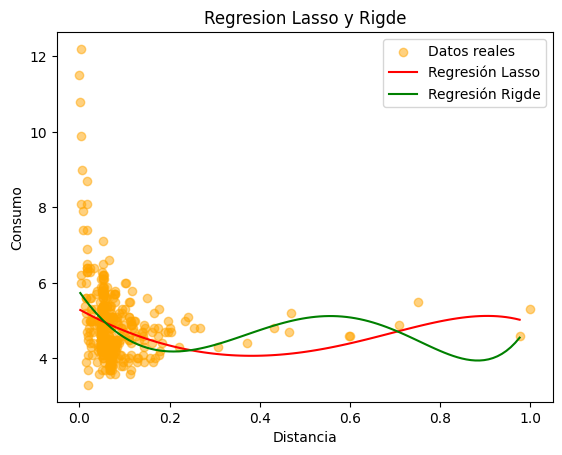

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values
X = x.reshape(-1, 1)  

# estandarizar los datos
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# divide los datos 80%/20% de forma aleatoria donde el 20% será para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
# se transforma matriz polinomial para realizar la curva
grado = 6
poly = PolynomialFeatures(grado)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

lasso = Lasso(alpha=0.001).fit(X_train_poly, y_train)
rigde = Ridge(alpha=0.001).fit(X_train_poly, y_train)

y_pred_l = lasso.predict(X_test_poly)
print('Error Cuadrático Medio Lasso:', mean_squared_error(y_test, y_pred_l))

y_pred_r = rigde.predict(X_test_poly)
print('Error Cuadrático Medio Rigde:', mean_squared_error(y_test, y_pred_r))

# usamos el linspace para generar la línea de ajuste
x_linea = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
x_linea_poly = poly.fit_transform(x_linea)
y_pred_l_poly = lasso.predict(x_linea_poly)
y_pred_r_poly = rigde.predict(x_linea_poly)

# graficamos
plt.scatter(X,y, alpha=0.5, color='orange')
plt.plot(x_linea, y_pred_l_poly, color='red')
plt.plot(x_linea, y_pred_r_poly, color='green')
plt.title("Regresion Lasso y Rigde")
plt.legend(["Datos reales","Regresión Lasso", "Regresión Rigde"])
plt.xlabel("Distancia")
plt.ylabel("Consumo")
plt.show()


2.5 ptos Modifique el parámetro de penalización y obtenga los valores de los parámetro y grafique las
predicciones ¿Qué puede comentar al respecto? ¿Qué ocurre al aumentar el valor de alfa (penalización)
en cada modelo?¿qué diferencia se observa entre Ridge y Lasso?.

**Respuesta:** 

Al evaluar los modelos con distintos grados, nos damos cuenta que el modelo más estable para este ejercicio, es el modelo Lasso, ya que al aumentar la gradualidad, el modelo Ridge aumenta con creces el error cuadrático medio. 

Sin embargo, al mantener una gradualidad baja, el modelo Ridge disminuye el error, llegando a ser menor que el error del modelo Lasso. 

También se pudo apreciar que con un menor grado ambos modelos se unen prácticamente en una misma curva. También concluimos que el modelo Lasso mantiene la penalización sobre los valores aislados (ruido).

Error Cuadrático Medio Lasso: 1.9255964074915055
Error Cuadrático Medio Rigde: 1.750469112217002


2.5 ptos Seleccione el modelo adecuado de acuerdo al error cuatrático medio.

**Respuesta:**  Seleccionamos el Rigde

3 Deploy (opcional)
* Incluya los tres modelos en una clase, de modo que se puedan ajustar, visualizar y predecir con las
tres variantes. Considere los parámetros que requiere cada opción.
* Genere una función para guardar el modelo. Para esto puede guardar los coeficientes en un archivo
o puede usar una librería como Pickle.
* Genere una función para cargar y predecir usando el modelo cargado.
* Cree un notebook que le permita usar la clase creada. Implemente tres ejemplos de uso.
* ¿Cómo podría testear la clase implementada?, proponga método para testear que todo está
funcionando bien.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

class regression():
    def __init__(self, tipo_regresion, x, y, grado=None, alpha=None):
        self.x = x
        self.y = y
        self.tipo_regresion = tipo_regresion
        self.X = x.reshape(-1, 1)
        self.grado = grado
        self.alpha = alpha

    def escalar_datos(self):
        # estandarizar los datos
        scaler = MinMaxScaler()
        X = scaler.fit_transform(self.X)
        return X
    
    def training_test(self, X, test_s=0.2, ran_state=13):
        # divide los datos 80%/20% de forma aleatoria donde el 20% será para pruebas
        X_train, X_test, y_train, y_test = train_test_split(X, self.y, test_size=test_s, random_state=ran_state)
        return X_train, X_test, y_train, y_test

    def seleccionar_regresion(self):
        X_std = self.escalar_datos()
        X_train, X_test, y_train, y_test = self.training_test(X_std)
        
        match self.tipo_regresion:
            case "lineal":
                modelo_lineal = LinearRegression()
                modelo_lineal.fit(X_std, self.y)
                y_pred_lin = modelo_lineal.predict(X_std)

                # graficamos
                titulo = self.imprimir_formula(modelo_lineal.intercept_, modelo_lineal.coef_, self.tipo_regresion)
                self.graficar_regresion(X_std, y_pred_lin, titulo)
                
                return modelo_lineal
            
            case "polinomial":
                modelo_poly = PolynomialFeatures(self.grado)
                X_poly = modelo_poly.fit_transform(X_std)
                modelo = LinearRegression()
                modelo.fit(X_poly, self.y)
                
                x_linea = np.linspace(X_std.min(), X_std.max(), 100).reshape(-1, 1) # hago la linea con los valores min. y max. de X
                y_linea = modelo.predict(modelo_poly.transform(x_linea))
                
                # graficamos
                titulo = self.imprimir_formula(modelo.intercept_, modelo.coef_, self.tipo_regresion)
                self.graficar_regresion(x_linea, y_linea, titulo)
                
                return modelo
            
            case "lasso":
                if X_std.shape[1] == 1:
                    # como la matriz tiene sólo una columna, debo transformarla a polinomial elevando a la potencia del grado
                    poly = PolynomialFeatures(self.grado)
                    X_train_poly = poly.fit_transform(X_train)
                    X_test_poly = poly.fit_transform(X_test)
                    
                    lasso = Lasso(alpha=self.alpha).fit(X_train_poly, y_train)
                    y_pred_l = lasso.predict(X_test_poly)
                    print('Error Cuadrático Medio Lasso:', mean_squared_error(y_test, y_pred_l))
                    
                    # buscar mi mejor alpha con una validación cruzada de 5 iteraciones
                    CV = 5
                    best_alpha = self.obtener_best_alpha(lasso, CV, X_train_poly, y_train)
                    print('Mejor alpha:', best_alpha)
                    
                    # ajustar el modelo con el mejor alpha
                    lasso_best = Lasso(alpha=best_alpha).fit(X_train_poly, y_train)
                    y_pred_l_best = lasso_best.predict(X_test_poly)
                    print('Error Cuadrático Medio best Lasso:', mean_squared_error(y_test, y_pred_l_best))
                    
                    # usamos el linspace para generar una uniforme línea de ajuste en X
                    x_linea = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
                    x_linea_poly = poly.fit_transform(x_linea)
                    y_pred_l_poly = lasso_best.predict(x_linea_poly)
                    
                    # graficamos
                    titulo = self.imprimir_formula(lasso_best.intercept_, lasso_best.coef_, self.tipo_regresion)
                    self.graficar_regresion(x_linea, y_pred_l_poly, titulo)
                    
                    return lasso_best
                
                else:
                    lasso = Lasso(alpha=self.alpha).fit(X_train, y_train)
                    y_pred_l = lasso.predict(X_test)
                    print('Error Cuadrático Medio Lasso:', mean_squared_error(y_test, y_pred_l))
                    
                    # buscar mi mejor alpha con una validación cruzada de 5 iteraciones
                    CV = 5
                    best_alpha = self.obtener_best_alpha(lasso, CV, X_train, y_train)
                    print('Mejor alpha:', best_alpha)
                    
                    # ajustar el modelo con el mejor alpha
                    lasso_best = Lasso(alpha=best_alpha).fit(X_train, y_train)
                    print('Error Cuadrático Medio best Lasso:', mean_squared_error(y_test, y_pred_l_best))
                    
                    y_pred_l_best = lasso_best.predict(X_test)
                    
                    # graficamos
                    titulo = self.imprimir_formula(lasso_best.intercept_, lasso_best.coef_, self.tipo_regresion)
                    self.graficar_regresion(x_linea, y_pred_l_best, titulo)
                    
                    return lasso_best
                    

            case "ridge":
                if X_std.shape[1] == 1:
                    # como la matriz tiene sólo una columna, debo transformarla a polinomial elevando a la potencia del grado
                    poly = PolynomialFeatures(self.grado)
                    X_train_poly = poly.fit_transform(X_train)
                    X_test_poly = poly.fit_transform(X_test)
                    
                    ridge = Ridge(alpha=self.alpha).fit(X_train_poly, y_train)
                    y_pred_r = ridge.predict(X_test_poly)
                    print('Error Cuadrático Medio Ridge:', mean_squared_error(y_test, y_pred_r))
                    
                    # buscar mi mejor alpha con una validación cruzada de 5 iteraciones
                    CV = 5
                    best_alpha = self.obtener_best_alpha(ridge, CV, X_train_poly, y_train)
                    print('Mejor alpha:', best_alpha)
                    
                    # ajustar el modelo con el mejor alpha
                    ridge_best = Ridge(alpha=best_alpha).fit(X_train_poly, y_train)
                    y_pred_r_best = ridge_best.predict(X_test_poly)
                    print('Error Cuadrático Medio best Ridge:', mean_squared_error(y_test, y_pred_r_best))
                    
                    # usamos el linspace para generar una uniforme línea de ajuste en X
                    x_linea = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
                    x_linea_poly = poly.fit_transform(x_linea)
                    y_pred_r_poly = ridge_best.predict(x_linea_poly)
                    
                    # graficamos
                    titulo = self.imprimir_formula(ridge_best.intercept_, ridge_best.coef_, self.tipo_regresion)
                    self.graficar_regresion(x_linea, y_pred_r_poly, titulo)
                    
                    return ridge_best
                
                else:
                    ridge = Ridge(alpha=self.alpha).fit(X_train, y_train)
                    y_pred_r = ridge.predict(X_test)
                    print('Error Cuadrático Medio Ridge:', mean_squared_error(y_test, y_pred_r))
                    
                    # buscar mi mejor alpha con una validación cruzada de 5 iteraciones
                    CV = 5
                    best_alpha = self.obtener_best_alpha(ridge, CV, X_train, y_train)
                    print('Mejor alpha:', best_alpha)
                    
                    # ajustar el modelo con el mejor alpha
                    ridge_best = Ridge(alpha=best_alpha).fit(X_train, y_train)
                    y_pred_r_best = lasso_best.predict(X_test)
                    print('Error Cuadrático Medio best Ridge:', mean_squared_error(y_test, y_pred_r_best))

                    # graficamos
                    titulo = self.imprimir_formula(ridge_best.intercept_, ridge_best.coef_, self.tipo_regresion)
                    self.graficar_regresion(x_linea, y_pred_r_best, titulo)
                    
                    return ridge_best
    
    
    def obtener_best_alpha(self, modelo, val_iteraciones, X_train, y_train):
        from sklearn.model_selection import GridSearchCV
       
        param_grid = {'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]} # valores de alpha a probar
        modelo_CV = GridSearchCV(modelo, param_grid, cv=val_iteraciones, n_jobs=-1) # cross validation de val_iteraciones
        modelo_CV.fit(X_train, y_train)
        best_alpha = modelo_CV.best_params_['alpha']
        
        return best_alpha

    def imprimir_formula (self, intercepto, coefs, nombre_modelo):
        if nombre_modelo == "lineal":
            formula = f"y = {intercepto.round(2)} + {coefs[0].round(2)}*x"
        else: 
            formula = f"y = {intercepto.round(2)} "
            # para cada uno de los coefs, es decir los thetas o x^n 
            for i, coef in enumerate(coefs):
                if abs(coef) > 0.00000001: # si el coeficiente es muy pequeño no lo toma en cuenta
                    formula += f"+ {coef.round(3)}x^{i} "    
        return formula
                
    def graficar_regresion(self, x_line, y_line, titulo=None):
        X_std = self.escalar_datos()
        plt.plot(x_line, y_line, color='red') # graficar la recta de ajuste
        plt.scatter(X_std, self.y, color='blue', alpha=0.4) # graficar los datos 
        if titulo:
            plt.title("Regresión " + str(self.tipo_regresion).capitalize() + "\n" + titulo)
        else:
            plt.title("Regresión \n" + self.tipo_regresion)
        plt.xlabel("Eje x")
        plt.ylabel("Eje y")
        plt.show()



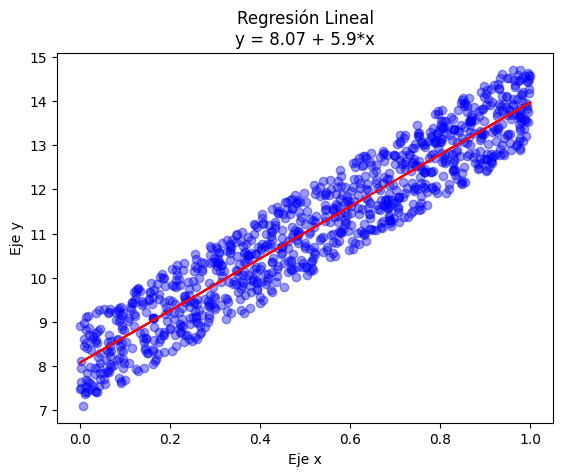

LinearRegression()

In [118]:
# Ejemplo de Regresión lineal
X = np.random.uniform(0,3, size=1000)
Y = 5 + 2*X + np.random.uniform(2,4,1000)
modelo_lineal = regression("lineal", X, Y)
modelo_lineal.seleccionar_regresion()

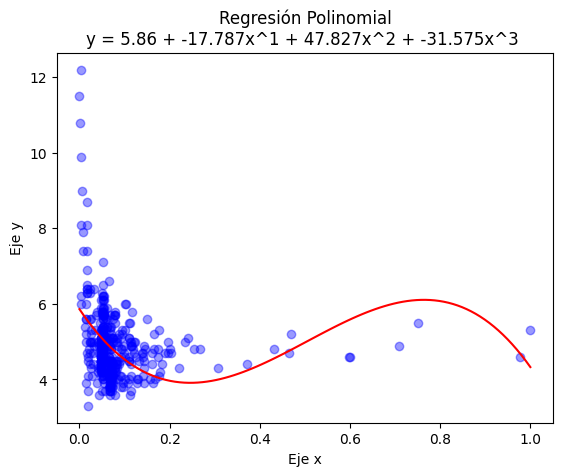

In [119]:
# Ejemplo de Regresión Polinomial
df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values

regresion_poly = regression("polinomial", x, y, 3)
modelo_poly = regresion_poly.seleccionar_regresion()


Error Cuadrático Medio Lasso: 2.107884521905332
Mejor alpha: 0.001
Error Cuadrático Medio best Lasso: 1.9255964074915055


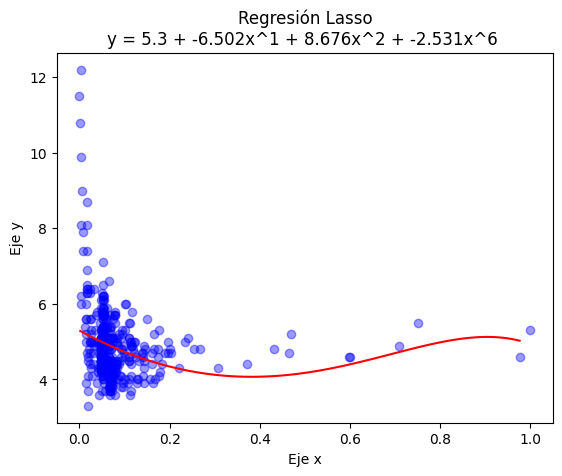

Lasso(alpha=0.001)

In [120]:
regresion_lasso = regression("lasso", x, y, 6, 0.01)
modelo_lasso= regresion_lasso.seleccionar_regresion()
modelo_lasso

Error Cuadrático Medio Ridge: 1.8632859856018036
Mejor alpha: 0.01
Error Cuadrático Medio best Ridge: 1.8632859856018036


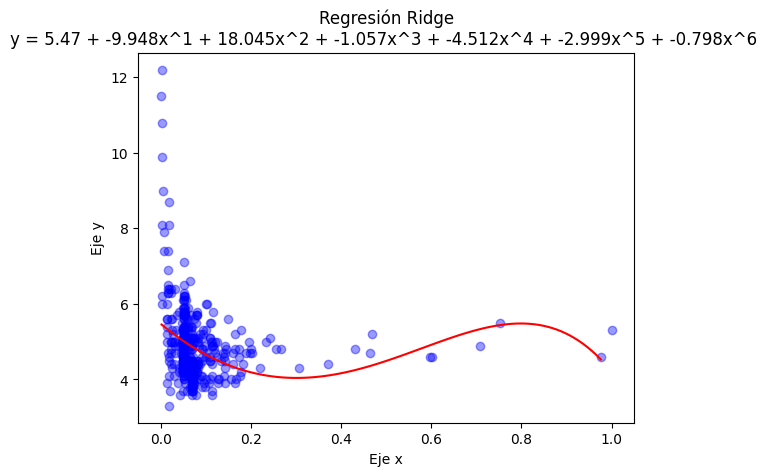

In [121]:
# Ejemplo de Regresión Ridge
df = pd.read_csv("measurements.csv", encoding="latin-1", sep=",")

x = df["distance"].str.replace(',', '.').astype(float).values
y = df["consume"].str.replace(',', '.').astype(float).values

regresion_ridge = regression("ridge", x, y, 6, 0.01)
modelo_ridge = regresion_ridge.seleccionar_regresion()

Error Cuadrático Medio Lasso: 1.9255964074915055
Mejor alpha: 0.001
Error Cuadrático Medio best Lasso: 1.9255964074915055


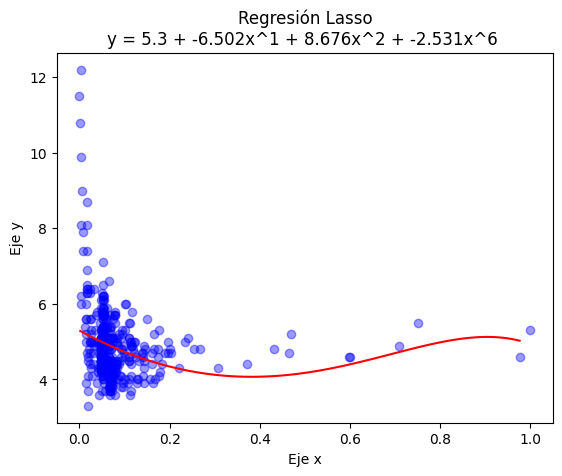

Coeficientes guardados en datos_exportados\coef_Regresion_lasso.csv


,Coeficientes
Intercepto,5.296911
x^2,-6.501929
x^3,8.675673
x^7,-2.530982


In [122]:
import os
import pandas as pd

def guardar_modelo(nombre_reg, modelo):
    
    # los coeficientes del modelo y el intercepto los guardo primero en una lista
    datos = [modelo.intercept_]
    datos.extend(modelo.coef_)
    
    # guardar los índices de los coeficientes en un dataframe
    coefs = []
    indices = []
    for i, coef in enumerate(datos):
        if abs(coef) > 0.0000000001: # si el coeficiente es muy pequeño no lo toma en cuenta
            coefs.append(coef)
            if i == 0: indices.append("Intercepto") # agrega el intercepto
            else: indices.append(f"x^{i}")
    
    # crear el dataframe
    df = pd.DataFrame(coefs, index=indices , columns=['Coeficientes'])
    
    # los dejaré en una subcarpeta llamada datos_exportados, si no existe la creará
    carpeta = "datos_exportados"
    if not os.path.exists(carpeta):
        os.makedirs(carpeta)
        
    # guardar en un archivo csv, los dejo en la carpeta datos_exportados  
    ruta_archivo = os.path.join(carpeta, f"coef_Regresion_{nombre_reg}.csv")
    df.to_csv(ruta_archivo)
    print(f"Coeficientes guardados en {ruta_archivo}")
    
    return df
## Aqui podemos cambiar a la regresión que queramos ejercutar, como lineal, polinomial, lasso, ridge
regresion = regression("lasso", x, y, 6, 0.001)
modelo_result = regresion.seleccionar_regresion()
df_r = guardar_modelo("lasso", modelo_result)
df_r
